In [3]:
import pandas as pd
df=pd.read_csv('Fake_Real_Data.csv')
print(df.shape)
df.head(5)

(9900, 2)


,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real


In [4]:
#checking class distribution
df['label'].value_counts(normalize=True)

Fake    0.505051
Real    0.494949
Name: label, dtype: float64

In [5]:
#enode the labels
df['label_num']=df['label'].map({"Fake":0,"Real":1})
df.head(5)

,Text,label,label_num
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0
1,U.S. conservative leader optimistic of common ...,Real,1
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0
4,Democrats say Trump agrees to work on immigrat...,Real,1


**Get spacy word vectors and store them in a pandas dataframe**

In [2]:
import spacy
spacy.prefer_gpu()
nlp = spacy.load("en_core_web_lg")

In [6]:
%%time
df['vector'] = df['Text'].apply(lambda text: nlp(text).vector)  

Wall time: 0 ns


In [7]:
df.head()

,Text,label,label_num,vector
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0,"[-0.6759837, 1.4263071, -2.318466, -0.451093, ..."
1,U.S. conservative leader optimistic of common ...,Real,1,"[-1.8355803, 1.3101058, -2.4919677, 1.0268308,..."
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1,"[-1.9851209, 0.14389805, -2.4221718, 0.9133005..."
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0,"[-2.7812982, -0.16120885, -1.609772, 1.3624227..."
4,Democrats say Trump agrees to work on immigrat...,Real,1,"[-2.2010763, 0.9961637, -2.4088492, 1.128273, ..."


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.vector.values,
    df.label_num,
    test_size=0.2,
    random_state=42
)

In [13]:
print(X_train.shape)
print(len(X_train[0]))
X_train

(7920,)
300


array([array([-2.0152547 ,  0.98641217, -2.3584037 ,  0.7322799 ,  4.107265  ,
               0.22396342,  0.6253973 ,  3.5500612 , -0.3170374 , -1.8648638 ,
               5.48375   ,  1.7104373 , -2.89802   ,  0.74601495, -0.29321775,
               2.350302  ,  1.2645686 , -0.06555936, -1.020395  , -0.9757464 ,
               1.2710329 , -0.8918504 ,  0.03230966, -0.19836223, -0.11627487,
              -1.1124969 , -1.7526532 , -0.5143565 , -0.88816553,  0.6904575 ,
               0.63850135,  0.09136863, -0.65409815, -2.1196    , -1.8729937 ,
              -0.9783039 , -0.09043716,  0.0499923 ,  1.3933578 ,  0.3026516 ,
               0.86849004,  0.11710268,  0.08253215, -0.04134313, -1.6167058 ,
               0.97282106,  1.4764651 , -1.9817255 , -0.51629865,  1.8665777 ,
              -1.3808936 ,  1.5644169 , -0.42669407, -4.5888352 , -0.8152755 ,
               1.0388777 ,  0.4114647 ,  0.7135278 ,  0.6071856 , -0.52639794,
               0.32114387, -0.6968656 ,  0.4408755 ,

In [26]:
X_train_2d = np.stack(X_train)
X_test_2d = np.stack(X_test)

In [20]:
X_train_2d.shape

(7920, 300)

In [31]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,classification_report
scaler=MinMaxScaler()
scaled_train_embed = scaler.fit_transform(X_train_2d.get())
scaled_test_embed = scaler.transform(X_test_2d.get())
clf = MultinomialNB()
clf.fit(scaled_train_embed, y_train)

MultinomialNB()

In [32]:
y_pred = clf.predict(scaled_test_embed)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       973
           1       0.94      0.96      0.95      1007

    accuracy                           0.95      1980
   macro avg       0.95      0.95      0.95      1980
weighted avg       0.95      0.95      0.95      1980



In [36]:
type(X_train_2d)

cupy.core.core.ndarray

In [38]:
from sklearn.neighbors import KNeighborsClassifier

clf=KNeighborsClassifier(n_neighbors=5,metric="euclidean")
clf.fit(X_train_2d.get(),y_train)
y_pred=clf.predict(X_test_2d.get())
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       973
           1       0.99      1.00      0.99      1007

    accuracy                           0.99      1980
   macro avg       0.99      0.99      0.99      1980
weighted avg       0.99      0.99      0.99      1980



**Confusion Matrix**

Text(95.72222222222221, 0.5, 'Truth')

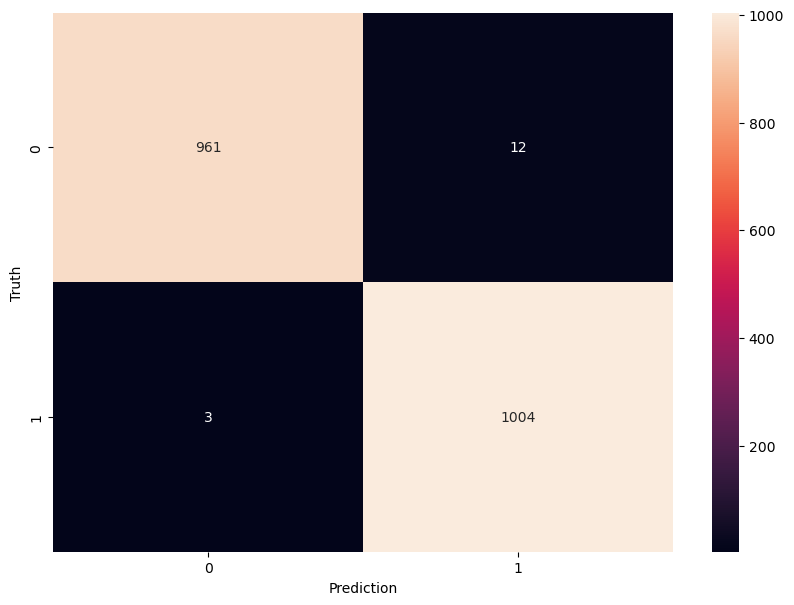

In [39]:
cm = confusion_matrix(y_test, y_pred)
cm

from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

- KNN model suffers from high dimensionality as it didn't perform well embedding with BOW and TF-IDF and it yielded excellent results with 300d Glove vectors.
- MultinomialNB model performed really well but slightly worse then KNN. this is due to information loss due to the elimination of the negative values present in the embedding vectors by applying minmax scaling method